In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2
from google.colab.patches import cv2_imshow

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360)


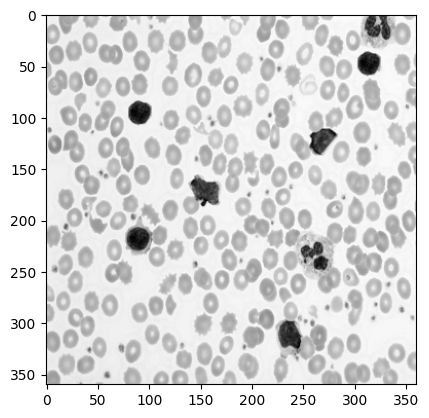

In [21]:
img = cv2.imread('/content/gdrive/My Drive/colab/Images/Images/cell.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

glmg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(glmg.shape)
plt.imshow(glmg, cmap='gray')

In [25]:
N = 18

dimh = np.int32(glmg.shape[0]/N)
dimw = np.int32(glmg.shape[1]/N)

dh_rest = np.int32(glmg.shape[0]%N)
dw_rest = np.int32(glmg.shape[1]%N)

meanimg = np.zeros((N, N))
outimg = np.zeros((glmg.shape[0], glmg.shape[1]))

In [23]:
def mean_function(img, dimh, dimw, h, w):
  count = 1
  sum = 0
  avg = 0

  for y in range(h, h + dimh):
    for x in range(w, w + dimw):
      sum = sum +img[y,x]
      count = count + 1

  avg = np.int32(sum/count)
  return avg


In [28]:
for h in range(0, glmg.shape[0]-dh_rest, dimh):
  for w in range(0, glmg.shape[1]-dw_rest, dimw):
    meanimg[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(glmg, dimh, dimw, h, w)



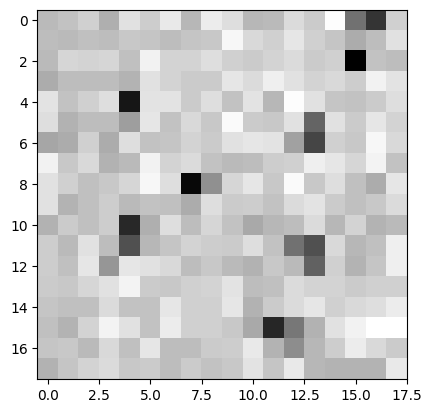

In [29]:
plt.imshow(meanimg, cmap='gray')


In [30]:
for h in range(0, glmg.shape[0]-dh_rest):
  for w in range(0, glmg.shape[1]-dw_rest):
    if(glmg[h,w] > meanimg[np.int32(h/dimh), np.int32(w/dimw)]):
        outimg[h,w] = 255
    else:
      outimg[h,w] = 0

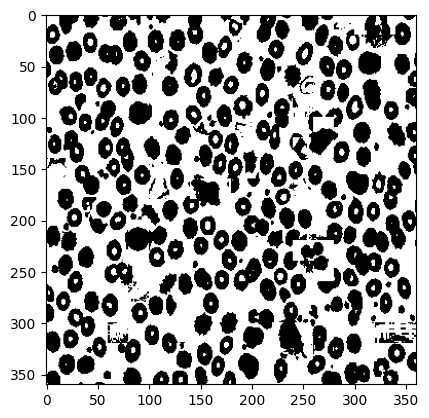

In [31]:
plt.imshow(outimg, cmap='gray')